In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#from tqdm import tqdm_notebook
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
import warnings


In [24]:
#functii
def plot_train_test(data_train: pd.DataFrame, data_test:pd.DataFrame, actual:str, predicted:str):
    plt.figure(figsize=(12,6))
    # Plot y1 and y2 from df1 with specified colors
    plt.plot(data_train.index[1:], data_train[actual][1:], color='blue', label=actual)
    plt.plot(data_train.index[1:], data_train[predicted][1:], color='orange', label=f'{predicted} in sample')

    # Plot y1 from df2 with specified color
    plt.plot(data_test.index, data_test[actual], color='blue', label='')

    # Plot y2 from df2 with specified color and label
    plt.plot(data_test.index, data_test[predicted], color='red', label=f'{predicted} out of sample')

    # Set the title and labels
    plt.title('In sample vs out of sample prediction')
    plt.xlabel('Date')
    plt.ylabel('Values')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


def train_and_plot(data_train:pd.DataFrame,data_test:pd.DataFrame,p:int, i:int,q:int, actual:str,length_test:int, plot=True, summary=True):
    model = ARIMA(data_train[actual], order=(p, i, q)).fit()
    if summary:
        print((model.summary()))
    label = f"ARIMA_{p}_{i}_{q}"
    data_train[label] = model.fittedvalues
    data_test[label] = model.forecast(length_test+1)
    if plot:
        plot_train_test(data_train=data_train, data_test=data_test, actual=actual,predicted=label)
    mape = mean_absolute_percentage_error(data_test[label],data_test[actual])
    return mape
    


    

In [25]:
df = pd.read_csv("../data/inflatie_ro.csv")
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

In [4]:
#plot
#check stationarity (discuss about it)
#check ACF PACF
#AR
#MA
#ARIMA
#compare


Text(0.5, 1.0, 'Inflatia in Romania')

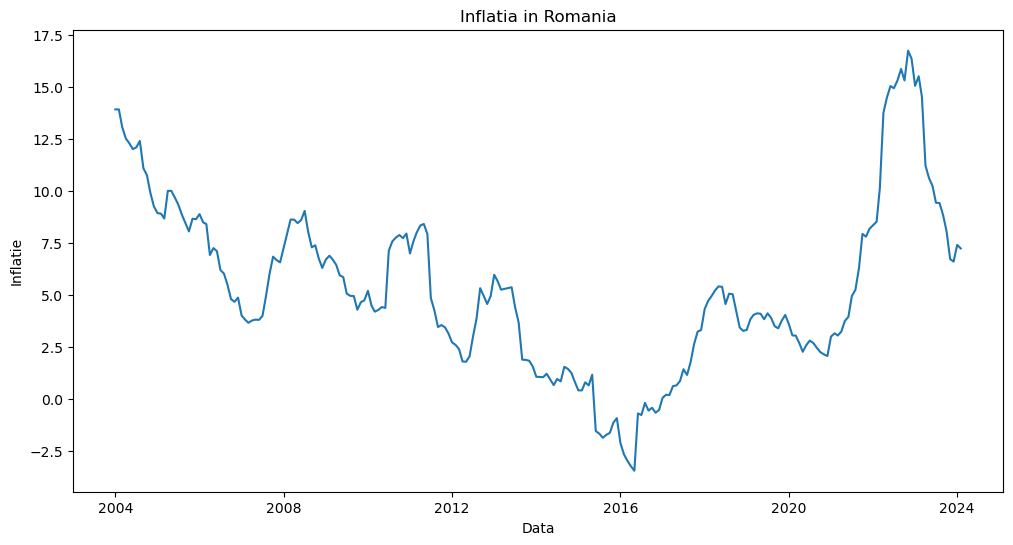

In [26]:
plt.figure(figsize=(12,6))
g = sns.lineplot(data=df, x='Data',y='Inflatie')
g.set_title('Inflatia in Romania')


### Stationaritate

__Discutie__

Conditii: 
* Medie constatna
* Varianta constanta
* Nu e sezonalitate

In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Inflatie'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.819432
p-value: 0.370858


In [28]:
#o facem stationara
df['Inflatie_diff_1'] = df['Inflatie'].diff()
df.dropna(inplace=True)
result = adfuller(df['Inflatie_diff_1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.530571
p-value: 0.000173


Text(0.5, 1.0, 'Difference 1')

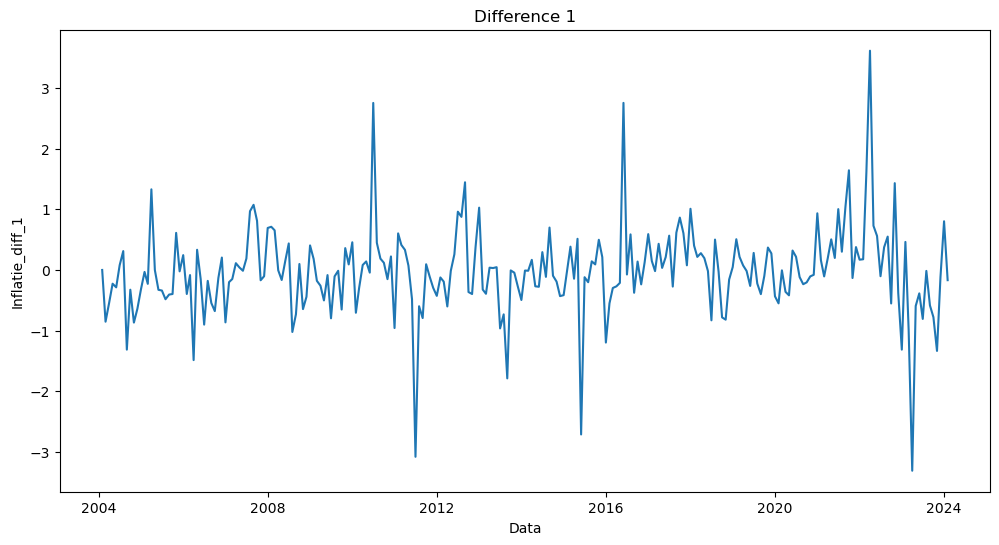

In [29]:
plt.figure(figsize=(12,6))
g = sns.lineplot(data=df, x='Data',y='Inflatie_diff_1')
g.set_title('Difference 1') 


<Axes: xlabel='Inflatie_diff_1', ylabel='Count'>

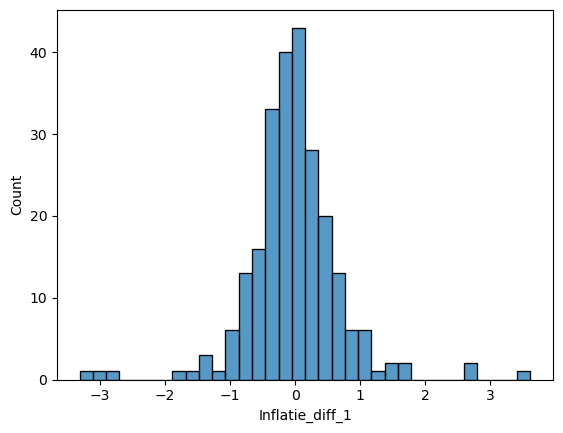

In [30]:
sns.histplot(data=df, x='Inflatie_diff_1')

In [16]:
df

,Inflatie,Inflatie_diff_1,Inflatie_diff_1_lag1
Data,,,
2004-02-01,13.929717,0.000000,NaN
2004-03-01,13.076285,-0.853433,0.000000
2004-04-01,12.533677,-0.542607,-0.853433
2004-05-01,12.306873,-0.226805,-0.542607
2004-06-01,12.020059,-0.286814,-0.226805
...,...,...,...
2023-10-01,8.059643,-0.778422,-0.585011
2023-11-01,6.723836,-1.335808,-0.778422
2023-12-01,6.604787,-0.119048,-1.335808


<Axes: xlabel='Inflatie_diff_1_lag1', ylabel='Inflatie_diff_1'>

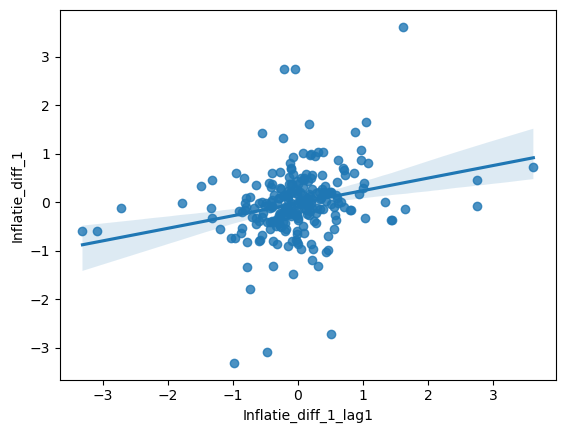

In [31]:
df['Inflatie_diff_1_lag1'] = df['Inflatie_diff_1'].shift(1)
sns.regplot(data=df, x='Inflatie_diff_1_lag1', y='Inflatie_diff_1')


In [18]:
length_test = 12
train = df[0:-length_test].copy()
test = df[-length_test:].copy()


### ACF PACF

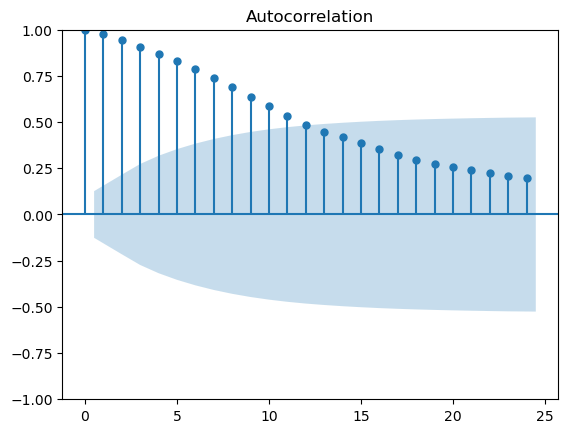

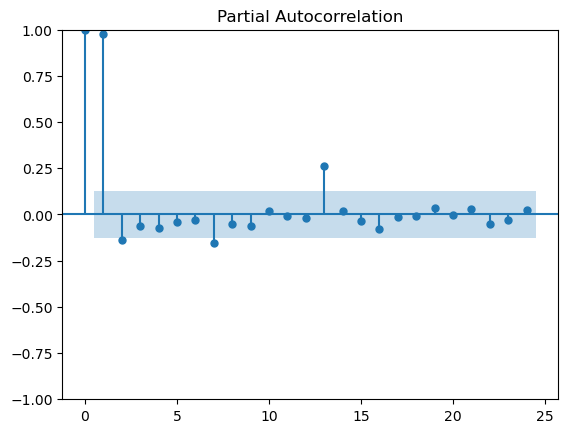

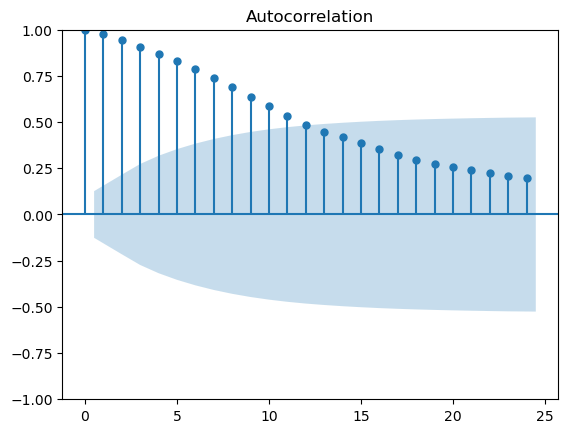

In [32]:
plot_pacf(df['Inflatie'])
plot_acf(df['Inflatie'])

Lag 1 contribuie cel mai mult la Yt, mai sunt si alte lag-uri, de exemplu lag 12

### AR

Yt = beta0 + beta1 yt-1 + beta2 yt-2 + .. + betap *yt-p

In [34]:
length_test

12

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -232.243
Date:                Thu, 15 May 2025   AIC                            468.486
Time:                        19:57:47   BIC                            475.345
Sample:                    02-01-2004   HQIC                           471.254
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2382      0.063      3.779      0.000       0.115       0.362
sigma2         0.4489      0.022     20.592      0.000       0.406       0.492
Ljung-Box (L1) (Q):                   0.13   Jarque-

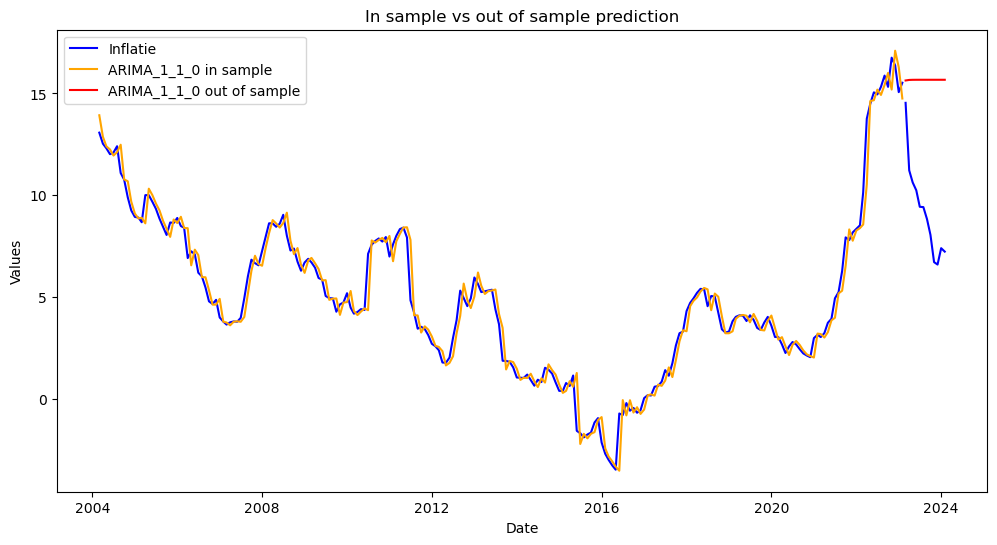

0.41281262257646406

In [33]:
#define experimentn
p = 1
i = 1
q = 0

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Inflatie',length_test=length_test)

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -233.518
Date:                Thu, 15 May 2025   AIC                            471.036
Time:                        20:01:50   BIC                            477.895
Sample:                    02-01-2004   HQIC                           473.803
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1952      0.066      2.979      0.003       0.067       0.324
sigma2         0.4540      0.022     20.636      0.000       0.411       0.497
Ljung-Box (L1) (Q):                   0.15   Jarque-

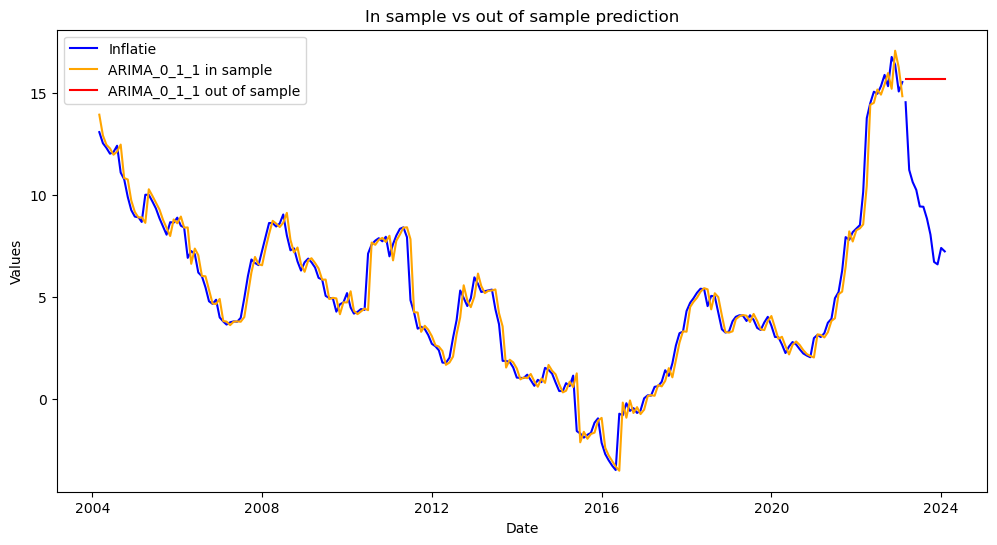

0.41267351593906376

In [35]:
#define experimentn
p = 0
i = 1
q = 1

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Inflatie',length_test=length_test)

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -231.082
Date:                Thu, 15 May 2025   AIC                            470.164
Time:                        20:02:08   BIC                            483.882
Sample:                    02-01-2004   HQIC                           475.699
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2125      0.067      3.166      0.002       0.081       0.344
ar.L2          0.0979      0.100      0.977      0.328      -0.098       0.294
ar.L3          0.0137      0.096      0.143      0.8

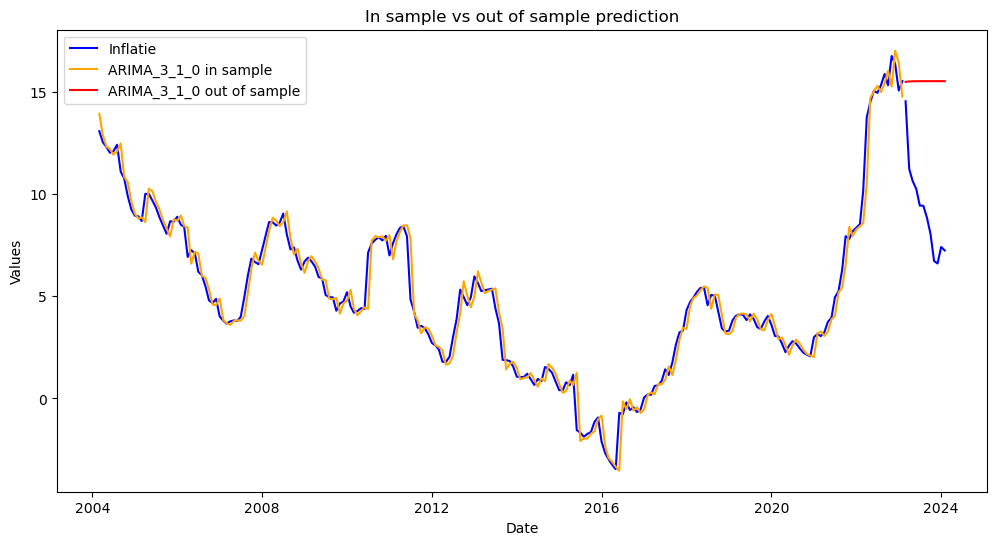

0.40719252251677235

In [36]:
#define experimentn
p = 3
i = 1
q = 0

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Inflatie',length_test=length_test)

Ljung-Box arata autocorelarea. P = 0.71, >0.05 => nu este autocorelare

### MA

Yt = u + et + beta1*et-1 + beta2*et-2 + ... + beta_q*et-q

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -233.518
Date:                Thu, 15 May 2025   AIC                            471.036
Time:                        20:02:19   BIC                            477.895
Sample:                    02-01-2004   HQIC                           473.803
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1952      0.066      2.979      0.003       0.067       0.324
sigma2         0.4540      0.022     20.636      0.000       0.411       0.497
Ljung-Box (L1) (Q):                   0.15   Jarque-

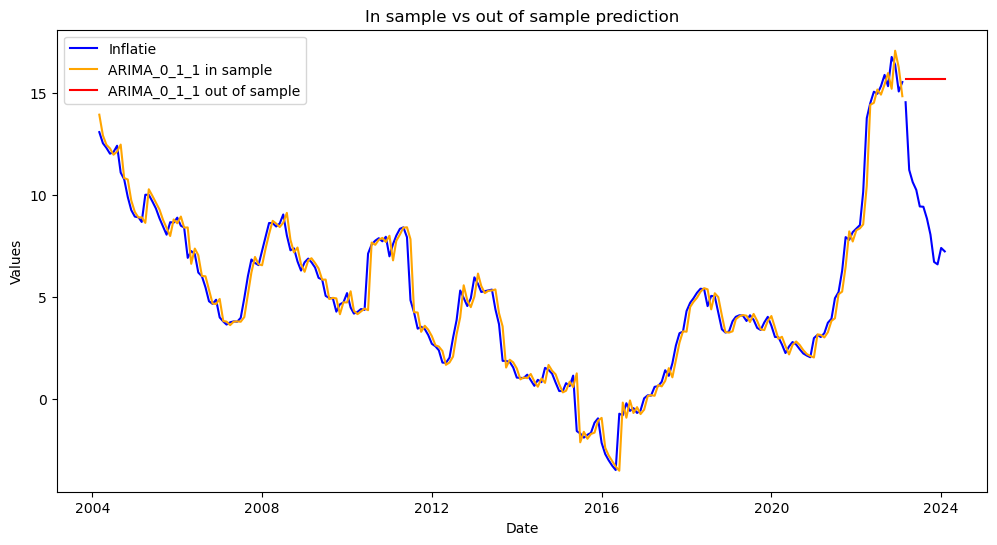

0.41267351593906376

In [37]:
#define experimentn
p = 0
i = 1
q = 1

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Inflatie',length_test=length_test)

# Experiments

In [38]:
%%time

warnings.filterwarnings("ignore", message="No frequency information was provided*")
warnings.filterwarnings("ignore", message="Maximum Likelihood optimization failed to converge*")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found*")
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found*")
warnings.filterwarnings("ignore", message="DataFrame is highly fragmented.*")

p_list = np.arange(0,15,1)
i_list = [1]
q_list = np.arange(0,15,1)

experiment_name_list = []
mape_list = []

for p in p_list:
    for i in i_list:
        for q in q_list:
            mape = train_and_plot(data_train=train,
                                data_test=test,
                                p=p,i=i,q=q,
                                actual='Inflatie',
                                length_test=length_test,
                                plot=False,
                                summary=False)
            name_experiment = f"{p}_{i}_{q}"
            experiment_name_list.append(name_experiment)
            mape_list.append(mape)
            print(f"Experiment {name_experiment} done with mape: {mape}")



Experiment 0_1_0 done with mape: 0.4075537411041504
Experiment 0_1_1 done with mape: 0.41267351593906376
Experiment 0_1_2 done with mape: 0.41083418308667063
Experiment 0_1_3 done with mape: 0.40624892744683
Experiment 0_1_4 done with mape: 0.4068782367973592
Experiment 0_1_5 done with mape: 0.4090888803097629
Experiment 0_1_6 done with mape: 0.34398008315372913
Experiment 0_1_7 done with mape: 0.309737003910929
Experiment 0_1_8 done with mape: 0.3170398361109693
Experiment 0_1_9 done with mape: 0.3119394167357734
Experiment 0_1_10 done with mape: 0.09847537507075438
Experiment 0_1_11 done with mape: 0.32115444212005906
Experiment 0_1_12 done with mape: 0.23453107955591937
Experiment 0_1_13 done with mape: 0.24168629196263605
Experiment 0_1_14 done with mape: 0.19860739824346554
Experiment 1_1_0 done with mape: 0.41281262257646406
Experiment 1_1_1 done with mape: 0.40561589823460115
Experiment 1_1_2 done with mape: 0.4110880080612376
Experiment 1_1_3 done with mape: 0.4129787886637199


In [40]:
results = pd.DataFrame({'experiment':experiment_name_list,'mape':mape_list})
results.sort_values(by='mape').head(10)

,experiment,mape
71,4_1_11,0.050131
26,1_1_11,0.051294
56,3_1_11,0.058304
104,6_1_14,0.059965
25,1_1_10,0.067042
89,5_1_14,0.068921
119,7_1_14,0.070121
147,9_1_12,0.071617
193,12_1_13,0.071982
118,7_1_13,0.077476


ARIMA

                               SARIMAX Results                                
Dep. Variable:               Inflatie   No. Observations:                  229
Model:                ARIMA(4, 1, 11)   Log Likelihood                -181.632
Date:                Thu, 15 May 2025   AIC                            395.263
Time:                        20:18:05   BIC                            450.133
Sample:                    02-01-2004   HQIC                           417.402
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6733      0.083     -8.153      0.000      -0.835      -0.511
ar.L2         -0.4654      0.120     -3.874      0.000      -0.701      -0.230
ar.L3         -0.3331      0.118     -2.813      0.0

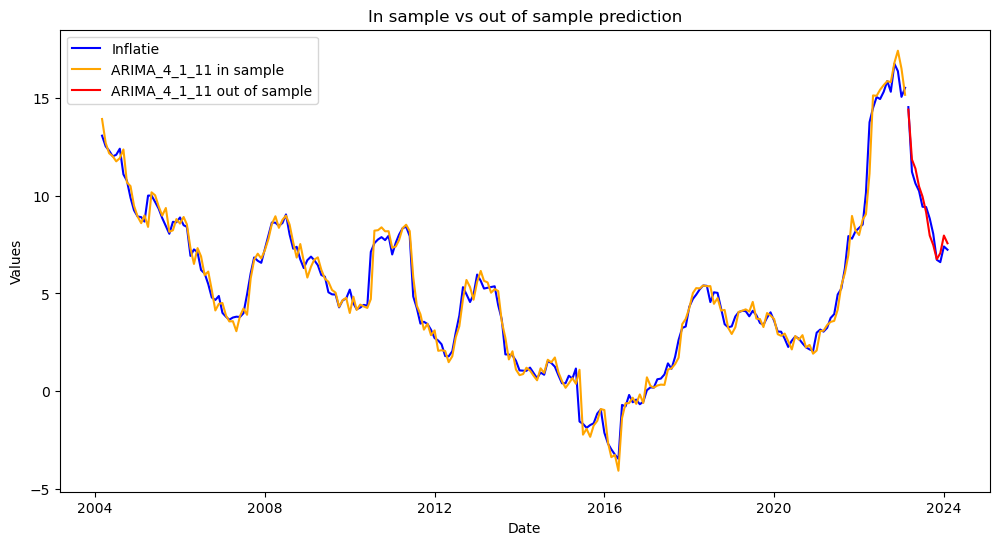

0.05013068216921252

In [41]:
#define experimentn
p = 4
i = 1
q = 11

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Inflatie',length_test=length_test)